In [4]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'../src/')

from utils import *
from pipe import *
from pipe.smooth_pipe import SmoothPipe
from curve import *

In [265]:
class straight_pipe(SmoothPipe):
    
    def __init__(self, l:np.float64, d:np.float64) -> None:
        
        assert l > 0
        assert d > 0

        r = d/2
        p1 = pt(0,r)
        p2 = pt(0,-r)
        p3 = pt(l,-r)
        p4 = pt(l,r)
        
        c1 = Cap
        c2 = Line
        c3 = Cap
        c4 = Line
        
        pts = [p1,p2,p3,p4]
        lines = [c1,c2,c3,c4]
        
        super().__init__(pts, lines)
        
    def boundary_value(self, flow_index):
        assert flow_index == 0
        h = [self.velocity_with_flux_zero()]
        for i,c in enumerate(self.curves[1:]):
            h.append(np.zeros_like(c.a))
        
        return np.concatenate(h)
        
    def velocity_with_flux_zero(self,r=.5):
        frequencies = np.random.uniform(1,2,4)
        
        t = self.curves[0].t
        dt = self.curves[0].dt_da*self.curves[0].dt_da
        
        profile = np.sum(np.exp(t[:,np.newaxis]*frequencies[np.newaxis,:]*np.pi),axis=1)
        
        t_ends = np.array([-r*1j,r*1j])
        value_at_ends = np.sum(np.exp(t_ends[:,np.newaxis]*frequencies[np.newaxis,:]*2*np.pi),axis=1)
        
        k = np.diff(value_at_ends)/np.diff(t_ends)
        
        b = -k*t_ends[0] + value_at_ends[0]
        
        profile = profile - k*t - b
        
        return profile
        

In [301]:
pipe = straight_pipe(7,1)

In [305]:
pipe.build()

In [ ]:
pipe.n_pts

In [303]:
u,v,p,o = pipe.fields_with_fluxes(np.array([1]),0,0)
xs = pipe.xs
ys = pipe.ys
interior = pipe.interior

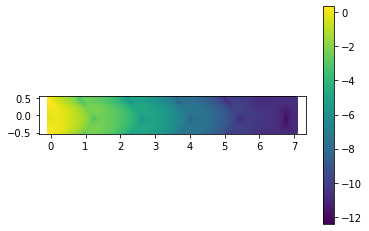

In [304]:
fig,ax = plt.subplots()
ax.set_aspect('equal')
fig.colorbar(ax.scatter(xs,ys,c=np.log10(np.sqrt(u**2 + v**2))))